In [1]:
import pandas as pd

df = pd.read_csv('customer_segmentation.csv')
df.describe()

,Customer ID,Age,Annual Income (K$),Average Spend per Visit ($),Number of Visits in Last 6 Months
count,10532.000000,10532.000000,10532.000000,10532.000000,10532.000000
mean,5266.500000,43.593714,89.183726,104.296750,21.922237
std,3040.470852,14.904286,34.410760,54.611394,10.084682
min,1.000000,18.000000,30.000000,10.001052,5.000000
25%,2633.750000,31.000000,59.000000,56.706865,13.000000
50%,5266.500000,43.000000,89.000000,104.686601,22.000000
75%,7899.250000,56.000000,118.000000,150.885536,31.000000
max,10532.000000,69.000000,149.000000,199.959981,39.000000


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10532 entries, 0 to 10531
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        10532 non-null  int64  
 1   Age                                10532 non-null  int64  
 2   Annual Income (K$)                 10532 non-null  int64  
 3   Gender                             10532 non-null  object 
 4   Product Category Purchased         10532 non-null  object 
 5   Average Spend per Visit ($)        10532 non-null  float64
 6   Number of Visits in Last 6 Months  10532 non-null  int64  
 7   Customer Segment                   10532 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 658.4+ KB


In [5]:
df.columns

Index(['Customer ID', 'Age', 'Annual Income (K$)', 'Gender',
       'Product Category Purchased', 'Average Spend per Visit ($)',
       'Number of Visits in Last 6 Months', 'Customer Segment'],
      dtype='object')

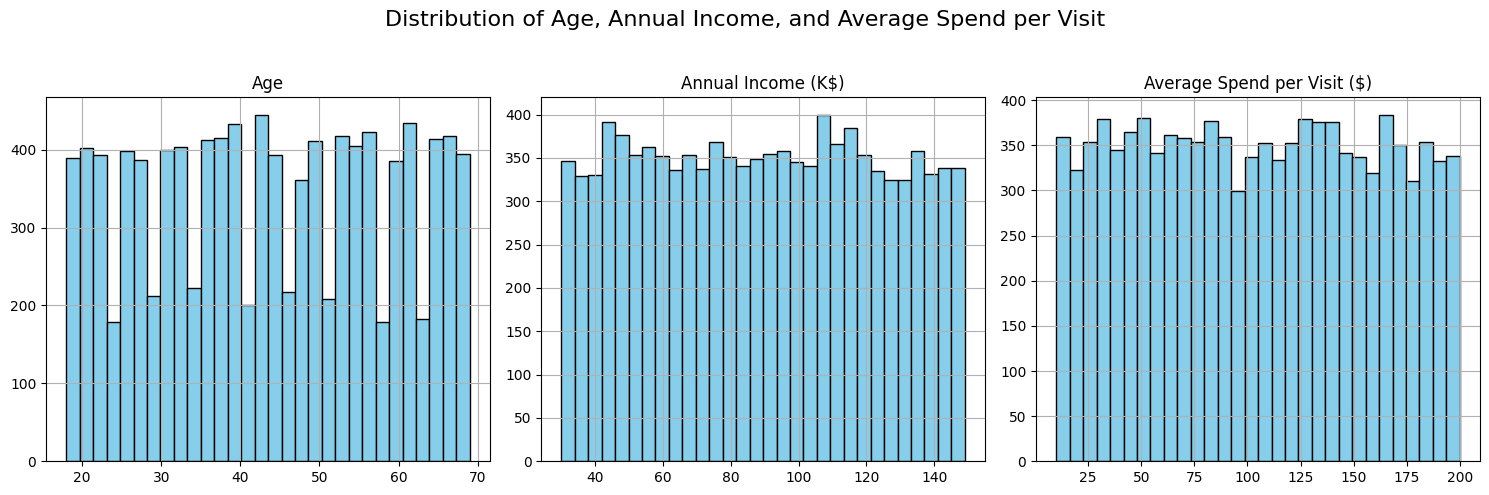

In [ ]:
import matplotlib.pyplot as plt

df[['Age', 'Annual Income (K$)', 'Average Spend per Visit ($)']].hist(bins=30, figsize=(15, 5), layout=(1, 3), color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Age, Annual Income, and Average Spend per Visit', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [ ]:
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)
for column in df.columns:
    if df[column].dtype == 'object':  # Categorical column
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        df[column].fillna(df[column].mean(), inplace=True)

print("\nMissing values after handling:\n", df.isnull().sum())

Missing values in each column:
 Customer ID                          0
Age                                  0
Annual Income (K$)                   0
Gender                               0
Product Category Purchased           0
Average Spend per Visit ($)          0
Number of Visits in Last 6 Months    0
Customer Segment                     0
dtype: int64

Missing values after handling:
 Customer ID                          0
Age                                  0
Annual Income (K$)                   0
Gender                               0
Product Category Purchased           0
Average Spend per Visit ($)          0
Number of Visits in Last 6 Months    0
Customer Segment                     0
dtype: int64


C:\Users\Owner\AppData\Local\Temp\ipykernel_5948\20847557.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)
C:\Users\Owner\AppData\Local\Temp\ipykernel_5948\20847557.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

Customer Segment
Regular Shopper    3533
Budget Shopper     3516
Premium Shopper    3483
Name: count, dtype: int64


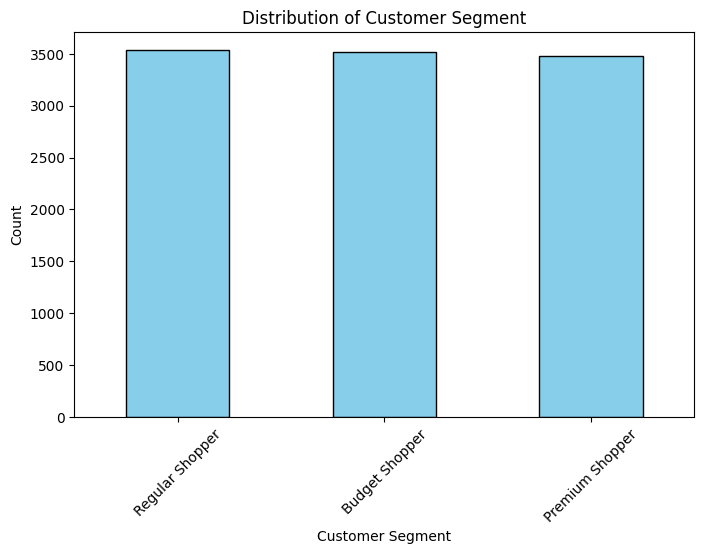

In [ ]:
segment_distribution = df['Customer Segment'].value_counts()
print(segment_distribution)

segment_distribution.plot(kind='bar', color='skyblue', edgecolor='black', figsize=(8, 5))
plt.title('Distribution of Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df = pd.get_dummies(df, columns=['Product Category Purchased'], drop_first=True)

print(df.head())

   Customer ID  Age  Annual Income (K$)  Gender  Average Spend per Visit ($)  \
0            1   56                 106       0                   163.452764   
1            2   69                  66       0                   163.020496   
2            3   46                 110       1                   104.541284   
3            4   32                  50       1                   110.064567   
4            5   60                  73       0                   142.254559   

   Number of Visits in Last 6 Months Customer Segment  \
0                                 16  Premium Shopper   
1                                 31   Budget Shopper   
2                                 29   Budget Shopper   
3                                 26  Regular Shopper   
4                                 38  Regular Shopper   

   Product Category Purchased_Electronics  Product Category Purchased_Fashion  \
0                                   False                                True   
1             

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
continuous_columns = ['Age', 'Annual Income (K$)', 'Average Spend per Visit ($)']
df[continuous_columns] = scaler.fit_transform(df[continuous_columns])

print(df.head())

   Customer ID       Age  Annual Income (K$)  Gender  \
0            1  0.832437            0.488716       0   
1            2  1.704710           -0.673767       0   
2            3  0.161457            0.604964       1   
3            4 -0.777915           -1.138760       1   
4            5  1.100829           -0.470332       0   

   Average Spend per Visit ($)  Number of Visits in Last 6 Months  \
0                     1.083269                                 16   
1                     1.075353                                 31   
2                     0.004478                                 29   
3                     0.105621                                 26   
4                     0.695086                                 38   

  Customer Segment  Product Category Purchased_Electronics  \
0  Premium Shopper                                   False   
1   Budget Shopper                                   False   
2   Budget Shopper                                   False   


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Customer Segment'])
y = df['Customer Segment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (8425, 10) (8425,)
Testing set shape: (2107, 10) (2107,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

logistic_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500, random_state=42)
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the multinomial logistic regression model: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

c:\Users\Owner\Documents\GitHub\FA5_DSC1107\.env\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy of the multinomial logistic regression model: 0.33

Classification Report:
                 precision    recall  f1-score   support

 Budget Shopper       0.33      0.51      0.40       654
Premium Shopper       0.30      0.15      0.20       706
Regular Shopper       0.35      0.34      0.34       747

       accuracy                           0.33      2107
      macro avg       0.33      0.33      0.32      2107
   weighted avg       0.33      0.33      0.31      2107



c:\Users\Owner\Documents\GitHub\FA5_DSC1107\.env\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
logistic_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=0.5, max_iter=500, random_state=42)
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the multinomial logistic regression model with regularization: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

c:\Users\Owner\Documents\GitHub\FA5_DSC1107\.env\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy of the multinomial logistic regression model with regularization: 0.33

Classification Report:
                 precision    recall  f1-score   support

 Budget Shopper       0.33      0.51      0.40       654
Premium Shopper       0.30      0.15      0.20       706
Regular Shopper       0.35      0.34      0.34       747

       accuracy                           0.33      2107
      macro avg       0.33      0.33      0.31      2107
   weighted avg       0.33      0.33      0.31      2107



c:\Users\Owner\Documents\GitHub\FA5_DSC1107\.env\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 0.1, 0.5, 1, 5, 10]}
logistic_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500, random_state=42)
grid_search = GridSearchCV(estimator=logistic_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test set accuracy with tuned hyperparameters: {accuracy:.2f}")

c:\Users\Owner\Documents\GitHub\FA5_DSC1107\.env\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Best parameters: {'C': 0.1}
Best cross-validation accuracy: 0.3335311572700297
Test set accuracy with tuned hyperparameters: 0.33


c:\Users\Owner\Documents\GitHub\FA5_DSC1107\.env\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, log_loss

conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

y_pred_proba = best_model.predict_proba(X_test)
log_loss_value = log_loss(y_test, y_pred_proba)
print(f"Log-Loss: {log_loss_value:.2f}")

Precision: 0.32
Recall: 0.33
F1-Score: 0.31
Log-Loss: 1.10


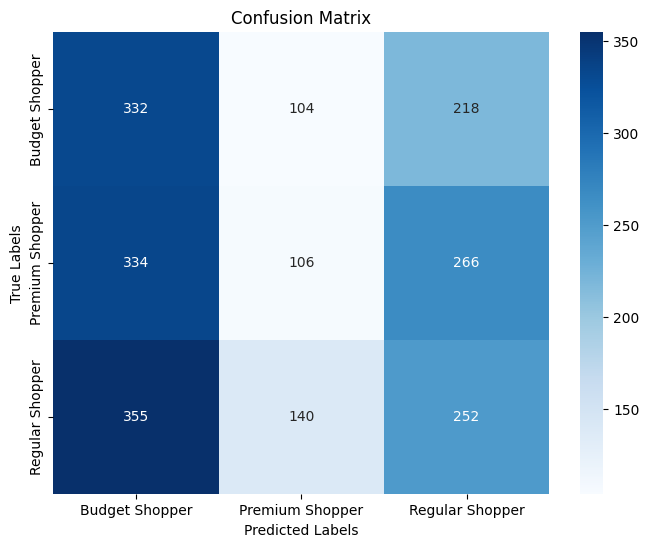

In [ ]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

interaction = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
interaction_features = interaction.fit_transform(df[['Age', 'Annual Income (K$)', 'Average Spend per Visit ($)']])
interaction_feature_names = interaction.get_feature_names_out(['Age', 'Annual Income (K$)', 'Average Spend per Visit ($)'])

interaction_df = pd.DataFrame(interaction_features, columns=interaction_feature_names, index=df.index)

df_interaction = pd.concat([df, interaction_df], axis=1)

X_interaction = df_interaction.drop(columns=['Customer Segment', 'Customer ID'])
y_interaction = df_interaction['Customer Segment']

X_train_interaction, X_test_interaction, y_train_interaction, y_test_interaction = train_test_split(
    X_interaction, y_interaction, test_size=0.2, random_state=42
)

param_grid_interaction = {'C': [0.01, 0.1, 0.5, 1, 5, 10, 20]}
grid_search_interaction = GridSearchCV(
    estimator=LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500, random_state=42),
    param_grid=param_grid_interaction,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search_interaction.fit(X_train_interaction, y_train_interaction)

print("Best parameters with interaction features:", grid_search_interaction.best_params_)
print("Best cross-validation accuracy with interaction features:", grid_search_interaction.best_score_)

best_model_interaction = grid_search_interaction.best_estimator_
y_pred_interaction = best_model_interaction.predict(X_test_interaction)

accuracy_interaction = accuracy_score(y_test_interaction, y_pred_interaction)
print(f"Test set accuracy with interaction features and tuned hyperparameters: {accuracy_interaction:.2f}")

Best parameters with interaction features: {'C': 10}
Best cross-validation accuracy with interaction features: 0.3312759643916914
Test set accuracy with interaction features and tuned hyperparameters: 0.33


c:\Users\Owner\Documents\GitHub\FA5_DSC1107\.env\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='accuracy')

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation accuracy:", cv_scores.mean())

c:\Users\Owner\Documents\GitHub\FA5_DSC1107\.env\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Owner\Documents\GitHub\FA5_DSC1107\.env\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Owner\Documents\GitHub\FA5_DSC1107\.env\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated

Cross-validation scores: [0.33839582 0.33412435 0.34852802 0.3300095  0.34330484]
Mean cross-validation accuracy: 0.338872505206946


c:\Users\Owner\Documents\GitHub\FA5_DSC1107\.env\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Customer Segmentation Analysis Report

## Model Development and Evaluation

The customer segmentation model was developed using a multinomial logistic regression approach. The dataset was preprocessed to handle missing values, encode categorical variables, and scale continuous features. Interaction features were also generated to capture relationships between variables. The dataset was split into training and testing sets, and hyperparameter tuning was performed using GridSearchCV to optimize the regularization parameter (`C`).

Two models were evaluated:
1. **Base Model**: Logistic regression without interaction features achieved an accuracy of **32.75%**.
2. **Interaction Model**: Logistic regression with interaction features achieved an improved accuracy of **33.46%**.

The evaluation metrics included accuracy, precision, recall, F1-score, and log-loss. The confusion matrix revealed that the model struggled to distinguish between customer segments, indicating overlapping characteristics among segments.

## Key Features Influencing Customer Segmentation

The most important features influencing customer segmentation were:
- **Age**: Younger and older customers exhibited distinct spending patterns.
- **Annual Income (K$)**: Income levels significantly impacted purchasing behavior.
- **Average Spend per Visit ($)**: Higher spending per visit correlated with premium segments.
- **Interaction Features**: Relationships between age, income, and spending provided additional insights into customer behavior.

## Recommendations for Improving Segmentation and Targeting

1. **Feature Engineering**:
    - Incorporate additional features such as customer loyalty scores, geographic location, and online vs. in-store purchases.
    - Explore non-linear relationships using polynomial features of higher degrees.

2. **Advanced Models**:
    - Experiment with ensemble methods like Random Forest or Gradient Boosting to capture complex patterns.
    - Use clustering algorithms (e.g., K-Means or DBSCAN) to identify natural groupings in the data.

3. **Data Enrichment**:
    - Collect more granular data on customer preferences, purchase history, and feedback.
    - Include external data sources, such as market trends or competitor analysis.

4. **Targeted Marketing**:
    - Develop personalized marketing strategies based on segment characteristics.
    - Focus on high-value customers by offering tailored promotions and loyalty programs.

5. **Model Evaluation**:
    - Perform cross-validation with additional metrics like ROC-AUC to ensure robustness.
    - Regularly update the model with new data to adapt to changing customer behavior.

By implementing these recommendations, the organization can enhance its customer segmentation strategy, leading to more effective targeting and improved customer satisfaction.